In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2024-08-08 06:25:45.238757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_train.npy') 
y_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_train.npy')  
x_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_test.npy')    
y_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_test.npy') 

In [3]:
# preprocess
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [4]:
# channel dimension
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [5]:
model = Sequential()

# first convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(19, 500, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

/Users/sailaharimullapudi/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 45s 217ms/step - accuracy: 0.6216 - loss: 0.9594 - val_accuracy: 0.7365 - val_loss: 0.6591
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 44s 221ms/step - accuracy: 0.7432 - loss: 0.6465 - val_accuracy: 0.7578 - val_loss: 0.5960
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 43s 217ms/step - accuracy: 0.8007 - loss: 0.5003 - val_accuracy: 0.8604 - val_loss: 0.4122
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 43s 216ms/step - accuracy: 0.8614 - loss: 0.3796 - val_accuracy: 0.8860 - val_loss: 0.3261
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - accuracy: 0.8674 - loss: 0.3480 - val_accuracy: 0.8974 - val_loss: 0.3005
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - accuracy: 0.8817 - loss: 0.3146 - val_accuracy: 0.8718 - val_loss: 0.3111
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - accuracy: 0.8955 - loss: 0.2877 - val_accuracy: 0.8974 - val_loss: 0.2904
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - accuracy: 0.9057 - loss: 0

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9240 - loss: 0.1948
Test accuracy: 0.9101412296295166
Test loss: 0.23563989996910095


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


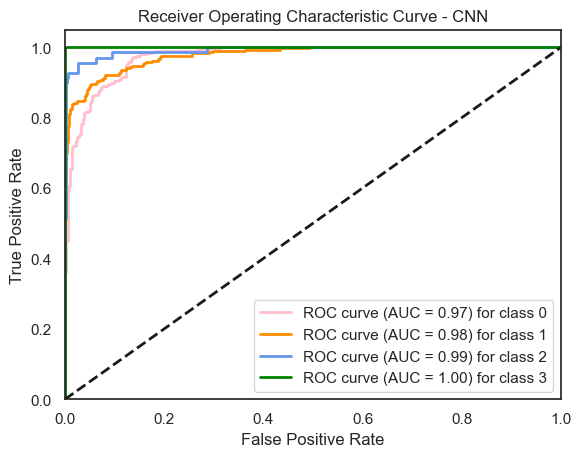

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['pink', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - CNN')
plt.legend(loc="lower right")
plt.show()

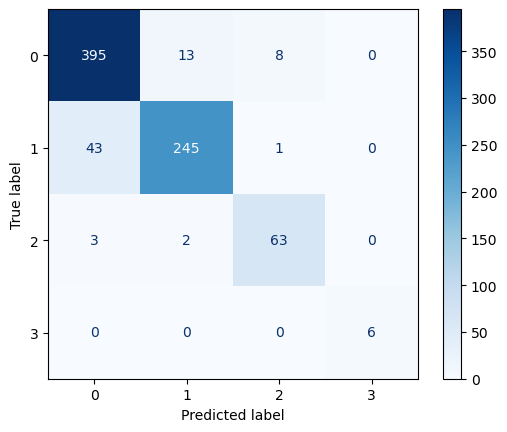

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

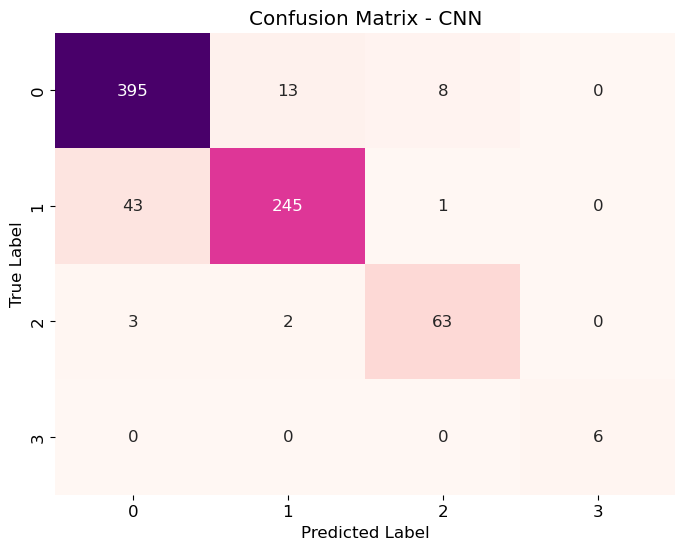

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN')
plt.show()

In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)

accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

     Class 0       0.90      0.95      0.92       416
     Class 1       0.94      0.85      0.89       289
     Class 2       0.88      0.93      0.90        68
     Class 3       1.00      1.00      1.00         6

    accuracy                           0.91       779
   macro avg       0.93      0.93      0.93       779
weighted avg       0.91      0.91      0.91       779

Accuracy: 0.9101412066752247


In [13]:
# log loss

from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss}')

Log Loss: 0.2356399684469875


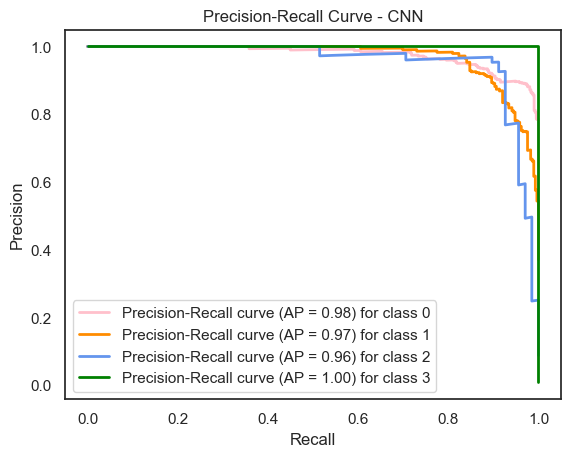

In [39]:
# precision-recall curve and average precision score - evalute models on highly imbalenced dataset

from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
average_precision = {}

for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

plt.figure()
for i, color in zip(range(4), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve (AP = {average_precision[i]:.2f}) for class {i}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CNN')
plt.legend(loc="lower left")
plt.show()

In [18]:
import seaborn as sns
import pandas as pd

metrics_report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], output_dict=True)

report_df = pd.DataFrame(metrics_report).transpose().reset_index()

clean_report = report_df[(report_df['index'] == "Class 0") |\
                         (report_df['index'] == "Class 1") |\
                         (report_df['index'] == "Class 2") |\
                         (report_df['index'] == "Class 3")]

clean_report.head()

,index,precision,recall,f1-score,support
0,Class 0,0.895692,0.949519,0.921820,416.0
1,Class 1,0.942308,0.847751,0.892532,289.0
2,Class 2,0.875000,0.926471,0.900000,68.0
3,Class 3,1.000000,1.000000,1.000000,6.0


In [19]:
keep_index = ["Class 0", "Class 1", "Class 2", "Class 3"]

heatmap_df = pd.DataFrame(metrics_report).transpose()
heatmap_df_idx = heatmap_df[heatmap_df.index.isin(keep_index)]
heatmap_df__cln = heatmap_df_idx.drop(columns=['support'])
heatmap_df__cln.head()

,precision,recall,f1-score
Class 0,0.895692,0.949519,0.921820
Class 1,0.942308,0.847751,0.892532
Class 2,0.875000,0.926471,0.900000
Class 3,1.000000,1.000000,1.000000


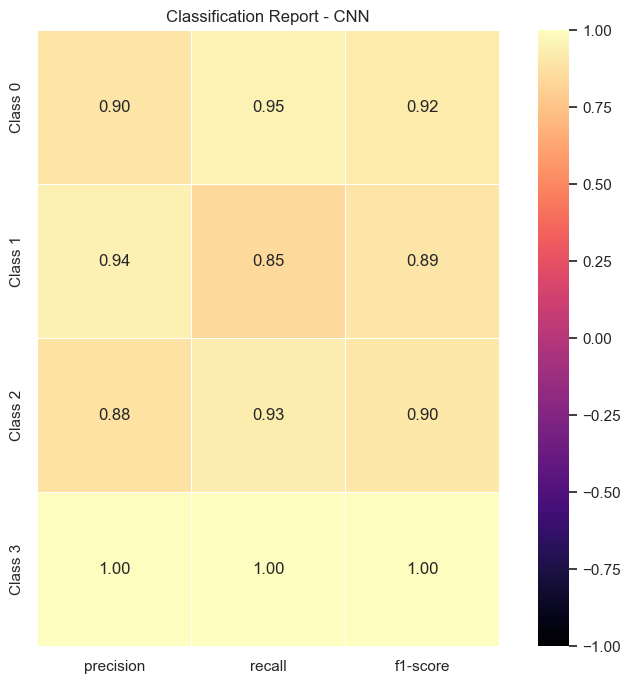

In [38]:
# Create an annotated heatmap

report_df = pd.DataFrame(metrics_report).transpose()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_df__cln, cmap = 'magma', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Classification Report - CNN')
plt.show()

# data overview

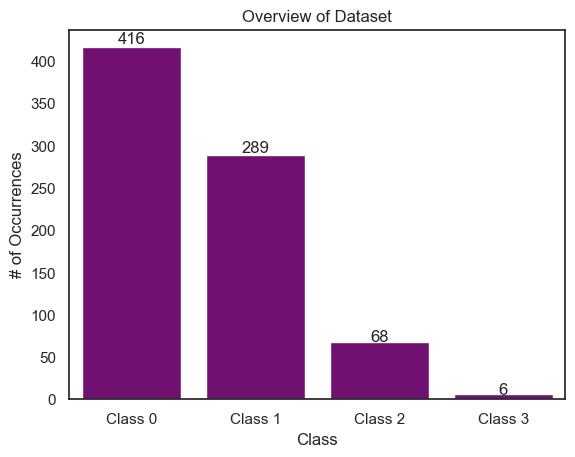

In [36]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

sns.set_theme(style="white")

test = sns.barplot(data=clean_report, x = "index", y = "support", color = "purple")
test.set(xlabel='Class', ylabel='# of Occurrences')
test.set_title('Overview of Dataset')
        
show_values(test)

In [41]:
total_data = np.concatenate([y_train, y_test])
final_total_data = pd.DataFrame({'Class 0': total_data[:, 0], 'Class 1': total_data[:, 1], 'Class 2': total_data[:, 2], 'Class 3': total_data[:, 3]})

final_total_data.head()

,Class 0,Class 1,Class 2,Class 3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [42]:
total_class_records = final_total_data.sum().to_frame().reset_index()

print(total_class_records)

     index       0
0  Class 0  3895.0
1  Class 1  3034.0
2  Class 2   750.0
3  Class 3   111.0


In [44]:
total_class_records.columns = ["Class", "# of Occurrences"]

total_class_records

,Class,# of Occurrences
0,Class 0,3895.0
1,Class 1,3034.0
2,Class 2,750.0
3,Class 3,111.0


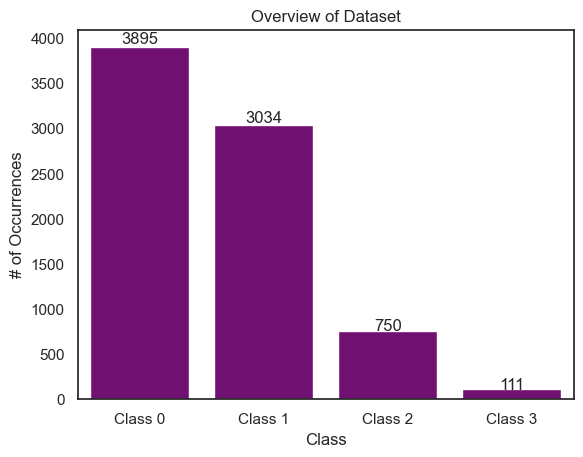

In [46]:
total_data_metrics = sns.barplot(data=total_class_records, x = "Class", y = "# of Occurrences", color = "purple")
total_data_metrics.set(xlabel='Class', ylabel='# of Occurrences')
total_data_metrics.set_title('Overview of Dataset')
        
show_values(total_data_metrics)